In [1]:
# Introduction to Regression NN in tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

In [6]:
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

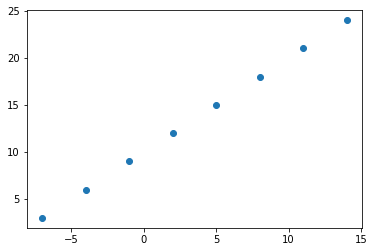

In [7]:
# Visualize it
plt.scatter(X,y)

In [8]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [9]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [10]:
# function x + 10 is output of nn

In [11]:
# Input and output shapes

In [12]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [13]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [14]:
# Turn our Numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

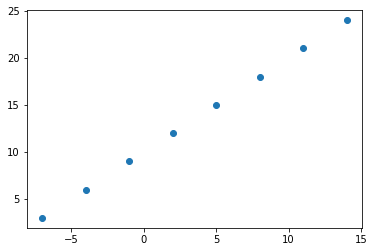

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [16]:
input_shape = X[0].shape
output_shape = y[0].shape

In [17]:
input_shape, output_shape # if there is no dimension it is scalar

(TensorShape([]), TensorShape([]))

In [18]:
# 

**STeps in modelling with tensorflow**

1. Creating a model - define the input and the output layers as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wring it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrics (what we can use to interpret the performance of our model
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [19]:
# set random seed to have the reprodubility

In [20]:
tf.random.set_seed(42)

In [21]:
# 1. Create a model using the sequential API - look for difference between sequential and functional api
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent,
              metrics=["mae"]
              )

# Fit the model
model.fit(X,y, epochs=5)

Epoch 1/5


ValueError: ignored

**From guide, because it is break from TensorFlow 2.7.* **

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

**Accuracy**
https://www.youtube.com/watch?v=lHAEPyWNgyY

MAE = mean absolute error
RMSE root mean squared error

Both are metrics are negatively oriented scores which means lower vaalues are better


In [ ]:
# Check out X and y
X, y

In [ ]:
# Try maek a prediction using our model
y_pred = model.predict([17.0])

In [ ]:
y_pred

In [ ]:
y_pred + 11

In [ ]:
## Improving our model

1. creating a model - here we might add more layers, incresing the number of hidden units ( al called neurons), change the activation function
2. compiling a model - here we might change the optimization function or perhaps the learning rate of the optimization function
3. fitting a model - here we might fit a model for more epochs

In [ ]:
# Let's rebuild our model

In [ ]:

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [ ]:
model.predict([17.0])

In [ ]:
# my tuning = another improving of model

# 1. ceate model
model = tf.keras.Sequential([
                             #tf.keras.layers.Dense(100, activation="relu"),
                             #tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              #optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

#---------------------------
model.predict([17.0])

In [ ]:
# our model is overfitting

# common ways to improve deep learning model

# adding layers
# increase the number of hidden units
# change the activation functions
# change the optimization function
# change the learning rate  (in general this is the most important)
# fitting on more data
# fitting for longer (more epochs)

In [ ]:
# my tuning = another improving of model

# 1. ceate model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation=None),
                             tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

#---------------------------
model.predict([17.0])

In [ ]:
# best model so far

In [ ]:
model.predict([17.0])

**Evaluating the model**

approach - repreat steps
1. Build a model
2. fit it
3. tweak it

experiment experiment experiment
In evaluating : visualize, visualize, visualize


It is good idea to visualize:
1. the data we are working with, what does it looklike?
2. the model itself - what does our model look like?
3. the training of a model
4. the predictions of model - how predictionsof model line up against ground truth (the original labels)

In [28]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

In [29]:

# Make labels for the dataset
y = X + 10
y

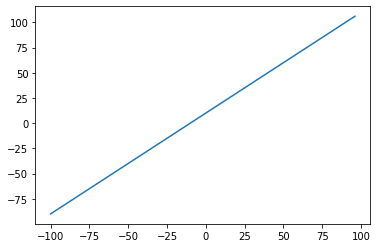

In [31]:
# Visualiz the data
import matplotlib.pyplot as plt
plt.plot(X,y)

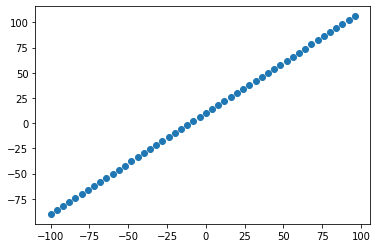

In [32]:
plt.scatter(X,y)

**the 3 sets concept**

* Training set - the model learns from this data, which is typically 70-80 % of the total data you have avaible
* Validation set -  the models gets tuned on this data, which is typically 10-15 % of the data avaible
*  Test set -  the model gets evaluated on this data to test what it has learned, this set is typically 10-15 % of the total avaible data

In [33]:
# check the length ofhow many samples we have
len(X)

50

In [36]:
# Split the data into train and test sets
X_train = X[:40] #first 40 are training samples (80 % of data)
y_train = y[:40]

X_test = X[40:] #last 10 are testing samples (20% of data)
y_test = y[40:]

In [37]:
len(X_train), len(X_test)

(40, 10)

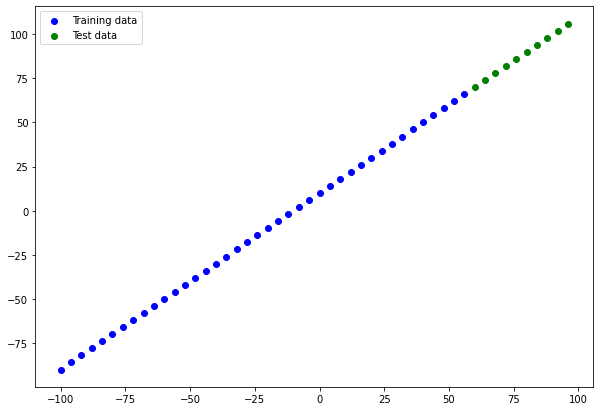

In [38]:
# Visualing the data
plt.figure(figsize=(10,7))
# Plot training datain blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plo test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend();

In [39]:
# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)


In [40]:
model.summary()

ValueError: ignored

In [41]:
# Lets create a model which builds automatically by defining input shape
tf.random.set_seed(42)

# 1. Create model same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layer")   # we are passing only one number to predict one number
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

* total params - total number of parameters in the model
* trainable prameters - these are the parameters (patterns) the model can update as it learns
* non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learn patterns or prameters  from other model during **transfer learning**

In [42]:
# Let's fit our model to the ttraining data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [43]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


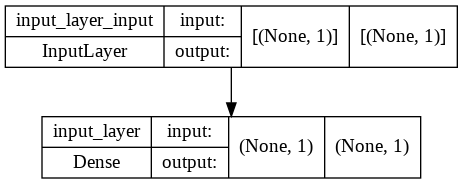

In [44]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

**Visualizing our model's predictions**

To visualize rediction it's a googd idea to plot them against the ground truth labels.

Often you will see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions)

In [45]:
# Make som predictions
y_pred = model.predict(X_test)
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to groud truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legend
  plt.legend();

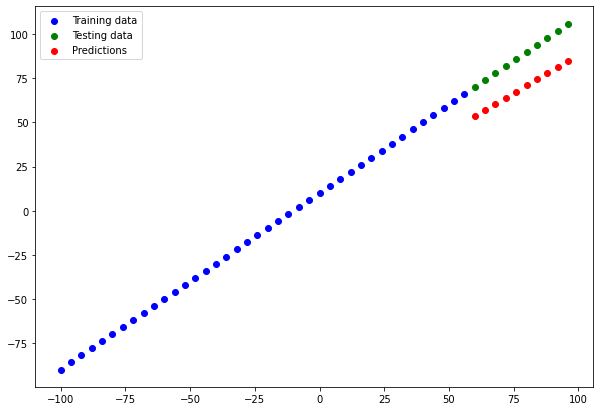

In [48]:
plot_predictions()

**Evaluating our model's predictions with regression evaluation metrics**

Depend on problem you are working on there will be different evaluation metrics to evaluate your model§s performance

Since we are working on a regression two of the main metrics:

MAE - mean absolute error on average how wrong is each of my model§s predictions
MSE - mean squared error "squared the average errors" = useful when larger errors are more significant than smaller errors
Huber = combination of two, less sensitive to outliers than MSE

In [49]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 203ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [50]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

In [ ]:
# result is not single metric, thats because these tensors are not the same shape !!!!! 6:20:45

In [51]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
       74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>

In [52]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [53]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [61]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
'''
Build a model - fit it - evaluate it - tweak ...

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer

3. Train for longer - give your model more of chance to find patterns in the data


Let's do 3 modelling experiments:
1. 'model_1' - same asthe original model, 1 layer, tained for 100 epochs
2. 'model_2' - 2 layers, taianed for 100 epochs
3. 'model_3' - 2 layers, trined for 500 epochs

In [55]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [56]:
### Build model_1

In [ ]:
tf.random.set_seed(42)

# 1. Create the model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

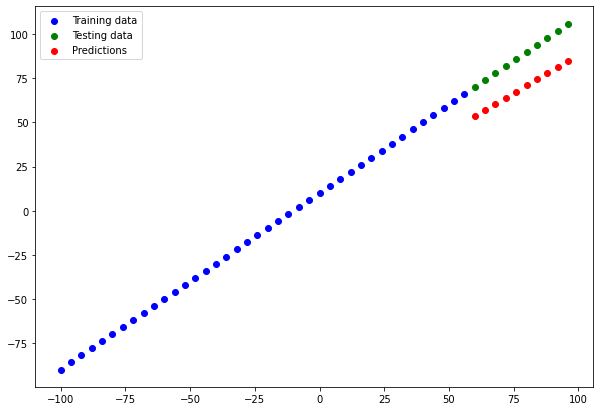

In [59]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [62]:
# Calculate model_1 evluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [77]:
### Build model_2
tf.random.set_seed(42)
# 2 dense layers trained for 100 epochs

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)


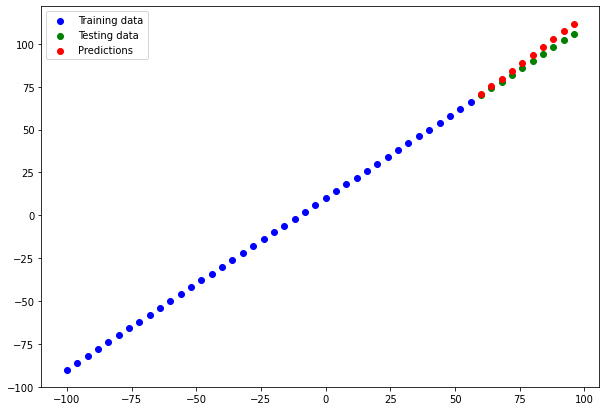

In [78]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [79]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [88]:
### Build model_3

tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [92]:
X_train,tf.expand_dims(X_train, axis=-1), y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [ 

In [80]:
x = tf.constant([[2, 3, 6], [4, 8, 15]])

In [81]:
print('x:', x)

x: tf.Tensor(
[[ 2  3  6]
 [ 4  8 15]], shape=(2, 3), dtype=int32)


In [86]:
res = tf.expand_dims(x, -1)

In [87]:
print('res: ', res)

res:  tf.Tensor(
[[[ 2]
  [ 3]
  [ 6]]

 [[ 4]
  [ 8]
  [15]]], shape=(2, 3, 1), dtype=int32)


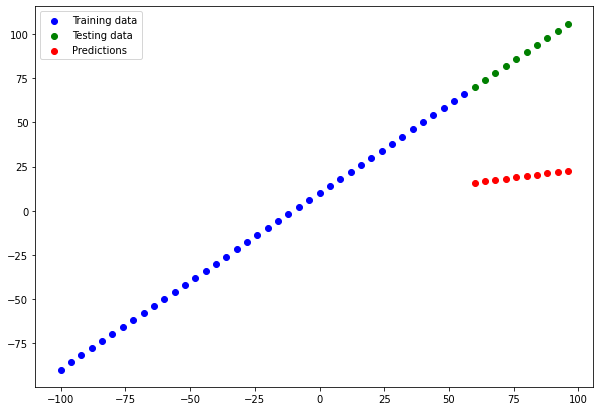

In [89]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [93]:
# calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

In [95]:
### Comparing the results of our experiments
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [96]:
# it seems like model_2 is the best
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

* TensorBoard - component of the tensoflow library to help track modelling experiments
* Weights & Biases - a tool for tracking all of kinds od mchine learning experiments